In [8]:
import spacy
import pandas as pd
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
nlp = spacy.load('de_core_news_md')
pd.set_option('display.max_colwidth', None)

In [10]:
REVIEWS_CLEANED_FILE_PATH = 'data/reviews_merged_cleaned.csv'

df = pd.read_csv(REVIEWS_CLEANED_FILE_PATH, sep=';')
df.head()

,Unnamed: 0.1,Unnamed: 0,caption,rating,food_positive,food_negative,service_positive,service_negative,ambient_positive,ambient_negative,price_positive,price_negative,waiting_positive,waiting_negative
0,0,0,mega cooles ambiente konzept bürger geschmacklich lecker bürger individuelle bedürfnisse anpassen allergien vegetarisch,4.0,0,0,0,0,1,0,0,0,0,0
1,1,1,super sympathische mitarbeiter freundliche gemütliche atmosphäre fantastisches essen sicher öfter,5.0,1,0,0,0,1,0,0,0,0,0
2,2,2,nenne burger schicki-micki gerne burgerladen dortmund hüstel absoluter kult maestro tozzi gedicht gegend space burger lupo beides einfach kult,5.0,0,0,0,0,0,0,0,0,0,0
3,3,3,gestern dritt selben burger bestellt gestern abend magen darm burger lecker irgendetwas schmeckte komisch erwartet,1.0,0,0,0,0,0,0,0,0,0,0
4,4,4,fanden burger restaurant klasse individuelle möglichkeiten zudem fleischlose alternativen ambiente zeitsprung vergangenheit kartenzahlung heutzutage zeitgemäß,4.0,0,0,0,0,0,0,0,0,0,0


In [11]:
df['caption']

0                                             mega cooles ambiente konzept bürger geschmacklich lecker bürger individuelle bedürfnisse anpassen allergien vegetarisch
1                                                                   super sympathische mitarbeiter freundliche gemütliche atmosphäre fantastisches essen sicher öfter
2                      nenne burger schicki-micki gerne burgerladen dortmund hüstel absoluter kult maestro tozzi gedicht gegend space burger lupo beides einfach kult
3                                                  gestern dritt selben burger bestellt gestern abend magen darm burger lecker irgendetwas schmeckte komisch erwartet
4      fanden burger restaurant klasse individuelle möglichkeiten zudem fleischlose alternativen ambiente zeitsprung vergangenheit kartenzahlung heutzutage zeitgemäß
                                                                                    ...                                                                              
328 

In [12]:
# Caption to text. Joining all captions in a long text
full_caption_text = '. '.join(df['caption'])
len(full_caption_text)

24746

In [13]:
# Top used words based on arguments
def getWordFrequency(text, pos="NOUN", top_items=0):
    doc = nlp(text)
    words = [token.lemma_
             for token in doc
             if (not token.is_stop and not token.is_punct and (pos == "" or token.pos_ == pos))]
    word_freq = Counter(words)

    return(dict(word_freq.most_common(top_items) if top_items else word_freq.most_common()))

### Bewertungen pro Nummer

In [14]:
sns.set_theme()

   rating  count
0     5.0    173
2     4.0     49
3     3.0     30
4     2.0     27
1     1.0     54


<AxesSubplot: xlabel='rating', ylabel='count'>

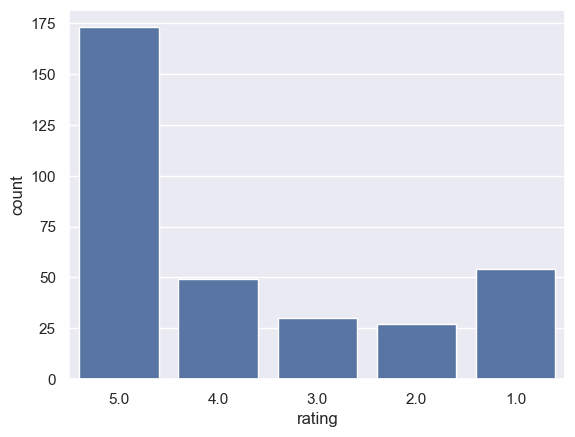

In [33]:
f, ax = plt.subplots(1,1)
ratings = df['rating'].value_counts().reset_index()
ratings.columns = ['rating', 'count']
ratings = ratings.sort_values(by=['rating'], ascending=False)
sns.barplot(data=ratings, x="rating", y='count', color='b', ax=ax, order=ratings['rating'])

### Meistverwendete Wörter

In [16]:
from wordcloud import WordCloud

In [17]:
freq = getWordFrequency(full_caption_text, "NOUN")

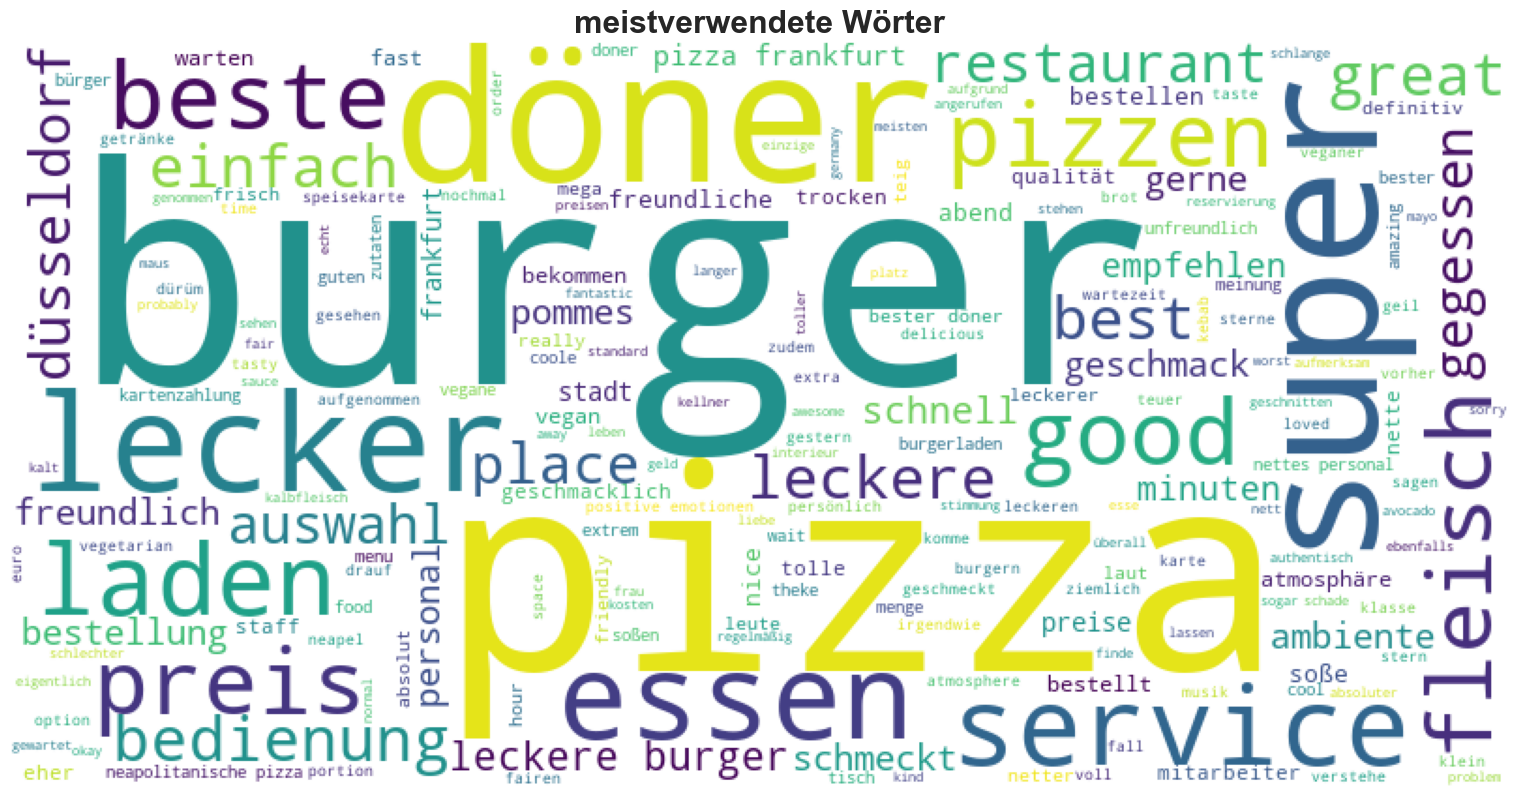

In [18]:
plt.figure(figsize=(15, 12), facecolor = None)
plt.imshow(WordCloud(width = 800, height = 400,
                     background_color='white').generate( full_caption_text ))
plt.axis('off')
plt.tight_layout(pad=0)
plt.title('meistverwendete Wörter', fontsize=23, fontweight='bold')
plt.show()

### Meistverwendete Nomen & Verben

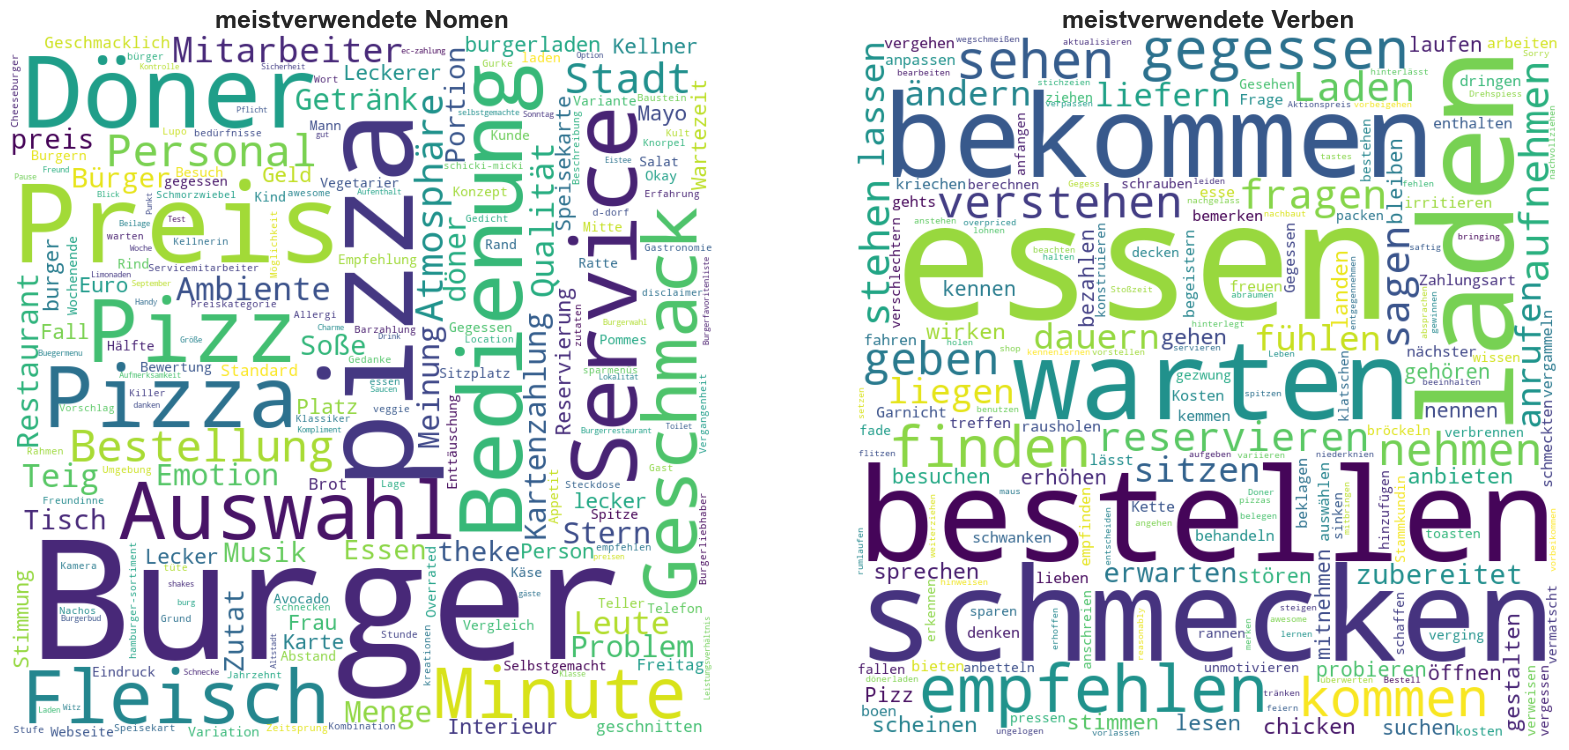

In [19]:
freqNoun = getWordFrequency(full_caption_text, "NOUN")
freqVerb = getWordFrequency(full_caption_text, "VERB")

freqs = [freqNoun, freqVerb]
titles = ['meistverwendete Nomen', 'meistverwendete Verben']

f, axes = plt.subplots(1,2)
f.set_figheight(15)
f.set_figwidth(20)
for i, ax in enumerate(axes):
    ax.imshow(WordCloud(width = 800, height = 800,
                        background_color='white').generate_from_frequencies( freqs[i] ))
    ax.axis('off')
    ax.set_title(titles[i], fontsize=18, fontweight='bold')

### Meisteverwendete Verben pro Bewertung

In [20]:
full_caption_text_1 = '. '.join(df.loc[df['rating'] == 1]['caption'])
full_caption_text_2 = '. '.join(df.loc[df['rating'] == 2]['caption'])
full_caption_text_3 = '. '.join(df.loc[df['rating'] == 3]['caption'])
full_caption_text_4 = '. '.join(df.loc[df['rating'] == 4]['caption'])
full_caption_text_5 = '. '.join(df.loc[df['rating'] == 5]['caption'])

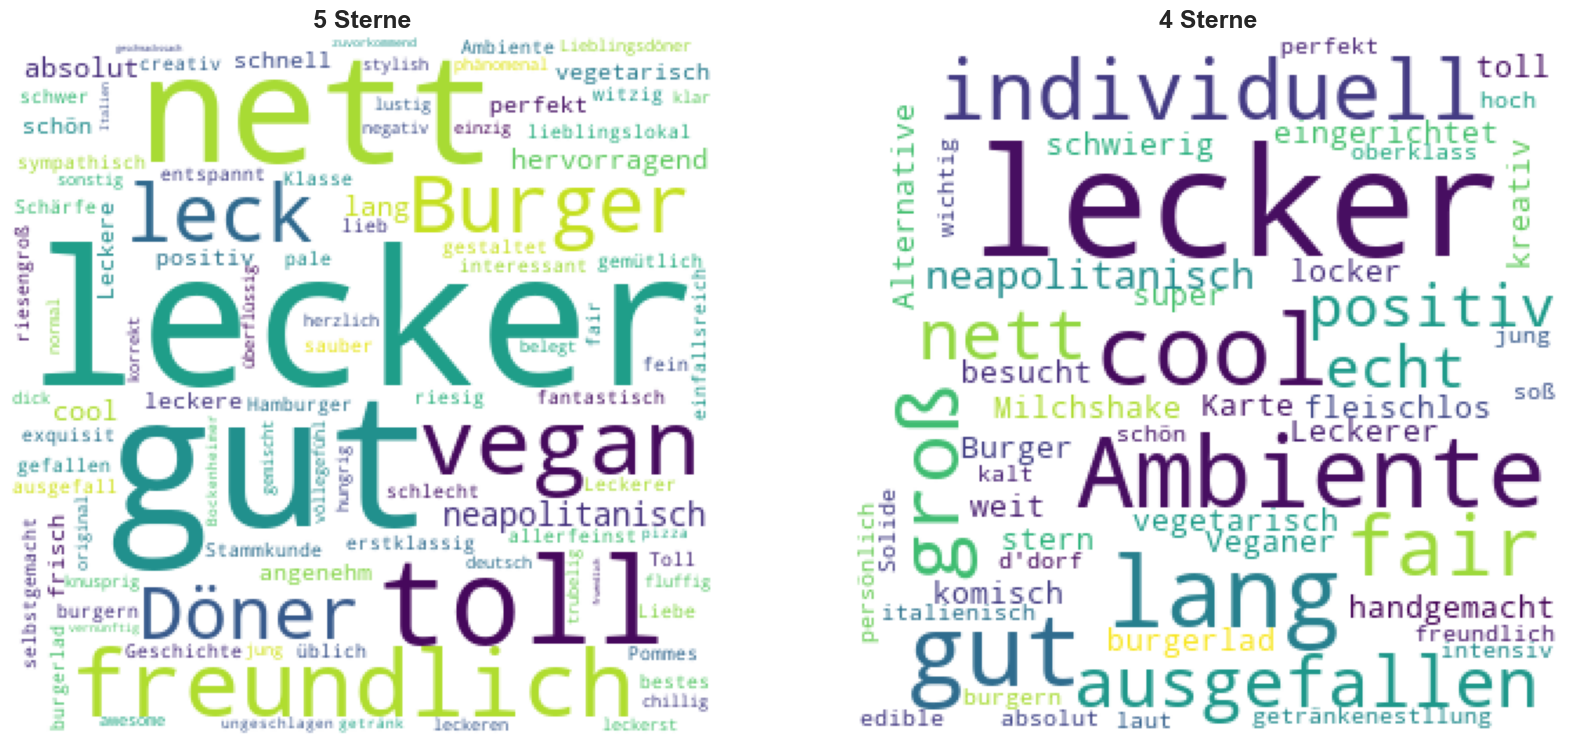

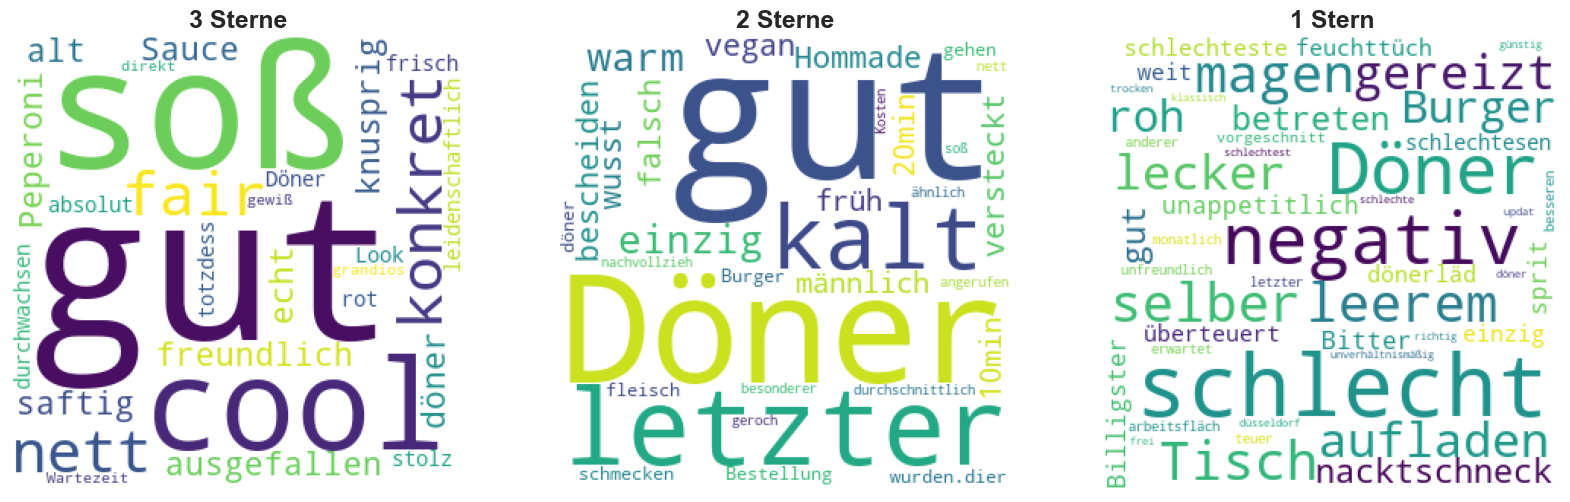

In [21]:
freqs1 = [ getWordFrequency(full_caption_text_5, "ADJ"),
           getWordFrequency(full_caption_text_4, "ADJ")]

freqs2 = [getWordFrequency(full_caption_text_3, "ADJ"),
          getWordFrequency(full_caption_text_2, "ADJ"),
          getWordFrequency(full_caption_text_1, "ADJ")]

titles1 = ['5 Sterne', '4 Sterne']
titles2 = ['3 Sterne', '2 Sterne', '1 Stern']

f1, axes1 = plt.subplots(1, 2)
f2, axes2 = plt.subplots(1, 3)

f1.set_figheight(15)
f1.set_figwidth(20)

f2.set_figheight(15)
f2.set_figwidth(20)

for i, ax in enumerate(axes1):
    ax.imshow(WordCloud(width = 300, height = 300,
                        background_color='white').generate_from_frequencies( freqs1[i] ))
    ax.axis('off')
    ax.set_title(titles1[i], fontsize=18, fontweight='bold')

for i, ax in enumerate(axes2):
    ax.imshow(WordCloud(width = 300, height = 300,
                        background_color='white').generate_from_frequencies( freqs2[i] ))
    ax.axis('off')
    ax.set_title(titles2[i], fontsize=18, fontweight='bold')